<a href="https://colab.research.google.com/github/utkarsh-284/Credit-Default-Risk/blob/main/Credit_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'>Credit Default Analysis and Prediction</h1>

# Introduction

This project analyzes credit card default risk using a dataset of 30,000 Taiwanese credit card clients. The dataset includes demographic features (age, education, marital status), payment history, billing statements, and repayment behavior over six months. The target variable ("DEFAULT") indicates whether a client defaulted in the subsequent month.

**Problem Statement:** Credit defaults pose significant financial risks to lenders. Traditional risk assessment methods often lack precision, leading to revenue loss or missed customer opportunities.

**Objective:** To build a predictive model that identifies high-risk clients using exploratory data analysis (EDA) and machine learning. This helps institutions optimize credit limits, improve collections, and reduce defaults.


**Source**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)

# Loading Important Libraries & Data

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [90]:
df = pd.read_excel("/content/default of credit card clients.xls")
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:</br>
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.</br>
X2: Gender (1 = male; 2 = female).</br>
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).</br>
X4: Marital status (1 = married; 2 = single; 3 = others).</br>
X5: Age (year).</br>

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:</br>
X6 = the repayment status in September, 2005;</br>
X7 = the repayment status in August, 2005;</br>
. . .;</br>
X11 = the repayment status in April, 2005.</br>
The measurement scale for the repayment status is:</br>
-1 = pay duly;</br>
1 = payment delay for one month;</br>
2 = payment delay for two months;</br>
. . .;</br>
8 = payment delay for eight months;</br>
9 = payment delay for nine months and above.</br>


X12-X17: Amount of bill statement (NT dollar):</br>
X12 = amount of bill statement in September, 2005;</br>
X13 = amount of bill statement in August, 2005;</br>
. . .;</br>
X17 = amount of bill statement in April, 2005.</br>
X18-X23: Amount of previous payment (NT dollar):</br>
X18 = amount paid in September, 2005;</br>
X19 = amount paid in August, 2005;</br>
. . .;</br>
X23 = amount paid in April, 2005.

# Exploring Data

## Preprocessing

**Let's change the column heading for better understanding:**

In [91]:
df.columns = df.iloc[0]
df = df.iloc[1:]
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Checking for missing values:

In [92]:
df.isnull().sum()

,0
0,
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0


**Let's check how many observations do we have for each category and change it with category name for better understanding:**

In [93]:
df["SEX"].value_counts()

,count
SEX,
2,18112
1,11888


In [94]:
df["EDUCATION"].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


As we know that we have only four categories for the `EDUCATION`, i.e. 1 = graduate school; 2 = university; 3 = high school; 4 = others, but we are getting other categories as well. Since we do not have information about these categories, let's merge them with the `others` for better understanding.

In [95]:
# Combine education categories 5, 6, and 0 into category 4
df['EDUCATION'] = df['EDUCATION'].replace([5, 6, 0], 4)
df["EDUCATION"].value_counts()

<ipython-input-95-c19bbba2797a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['EDUCATION'] = df['EDUCATION'].replace([5, 6, 0], 4)


,count
EDUCATION,
2,14030
1,10585
3,4917
4,468


In [96]:
df["MARRIAGE"].value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


Similarly, we have information about only three categories for `MARRIAGE`, i.e. 1 = married; 2 = single; 3 = others. Since we are getting another category, let's merge them with `others` category.

In [97]:
df["MARRIAGE"] = df["MARRIAGE"].replace([0], 3)
df["MARRIAGE"].value_counts()

<ipython-input-97-8249626ad3da>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["MARRIAGE"] = df["MARRIAGE"].replace([0], 3)


,count
MARRIAGE,
2,15964
1,13659
3,377


Let's create a new dataframe coppying the original dataframe for our future work. Also, let's change the name for categories under `SEX`, `EDUCATION` and `MARRIAGE` for better understanding:

In [98]:
df1 = df.copy()
df1['SEX'] = df1['SEX'].replace({1: 'Male', 2: 'Female'})
df1['EDUCATION'] = df1['EDUCATION'].replace({1: 'Graduate School',
                                           2: 'University',
                                           3: 'High School',
                                           4: 'Others'})
df1['MARRIAGE'] = df1['MARRIAGE'].replace({1: 'Married',
                                         2: 'Single',
                                         3: 'Others'})

We have observed that there are different columns for each month of Bill Amount and Amount Paid, let's merge them and create new columns `TOTAL_BILL_AMT` and `TOTAL_PAY_AMT` respectively for each individual.

Also, let us rename the column of `default payment next month` to simply `DEFAULT` for better understanding and utility.

In [99]:
df1["TOTAL_BILL_AMT"] = df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4",
                           "BILL_AMT5", "BILL_AMT6"]].sum(axis=1)
df1["TOTAL_PAY_AMT"] = df[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4",
                          "PAY_AMT5", "PAY_AMT6"]].sum(axis=1)

df1 = df1.rename(columns={'default payment next month': 'DEFAULT'})
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,TOTAL_BILL_AMT,TOTAL_PAY_AMT
1,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,7704,689
2,2,120000,Female,University,Single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,17077,5000
3,3,90000,Female,University,Single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,101653,11018
4,4,50000,Female,University,Married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,231334,8388
5,5,50000,Male,University,Married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,109339,59049


In [100]:
df1['TOTAL_BILL_AMT'] = pd.to_numeric(df1['TOTAL_BILL_AMT'], errors='coerce').fillna(0)
df1['TOTAL_PAY_AMT'] = pd.to_numeric(df1['TOTAL_PAY_AMT'], errors='coerce').fillna(0)

In [101]:
df1.shape

(30000, 27)

For better understanding and useful insights, let's remove all those observations with 'Others' under `EDUCATION` and `MARRIAGE`, since we can not draw any conclusion for these observations.

In [102]:
df2 = df1[df1['EDUCATION'] != 'Others']
df2 = df2[df2['MARRIAGE'] != 'Others']
df2.shape

(29163, 27)

## Checking for outliers

**Let us plot the Box-plot for the `TOTAL_BILL_AMT` and `TOTAL_PAY_AMT` with respect to `DEFAULT` to check the presence of outliers in the data:**

In [103]:
df2[['TOTAL_BILL_AMT', 'TOTAL_PAY_AMT']].describe()

,TOTAL_BILL_AMT,TOTAL_PAY_AMT
count,2.916300e+04,2.916300e+04
mean,2.696711e+05,3.149878e+04
std,3.798073e+05,5.700921e+04
min,-3.362590e+05,0.000000e+00
25%,2.851800e+04,6.700000e+03
50%,1.259820e+05,1.439600e+04
75%,3.425015e+05,3.347400e+04
max,5.263883e+06,2.314152e+06


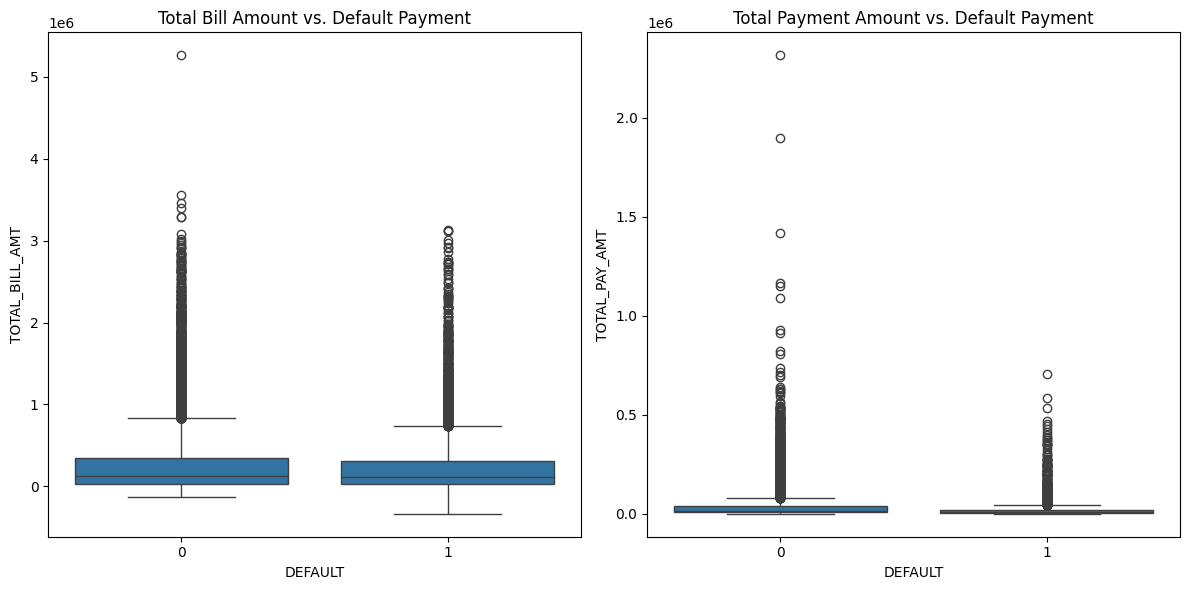

In [104]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='DEFAULT', y='TOTAL_BILL_AMT', data=df2)
plt.title('Total Bill Amount vs. Default Payment')

plt.subplot(1, 2, 2)
sns.boxplot(x='DEFAULT', y='TOTAL_PAY_AMT', data=df2)
plt.title('Total Payment Amount vs. Default Payment')

plt.tight_layout()

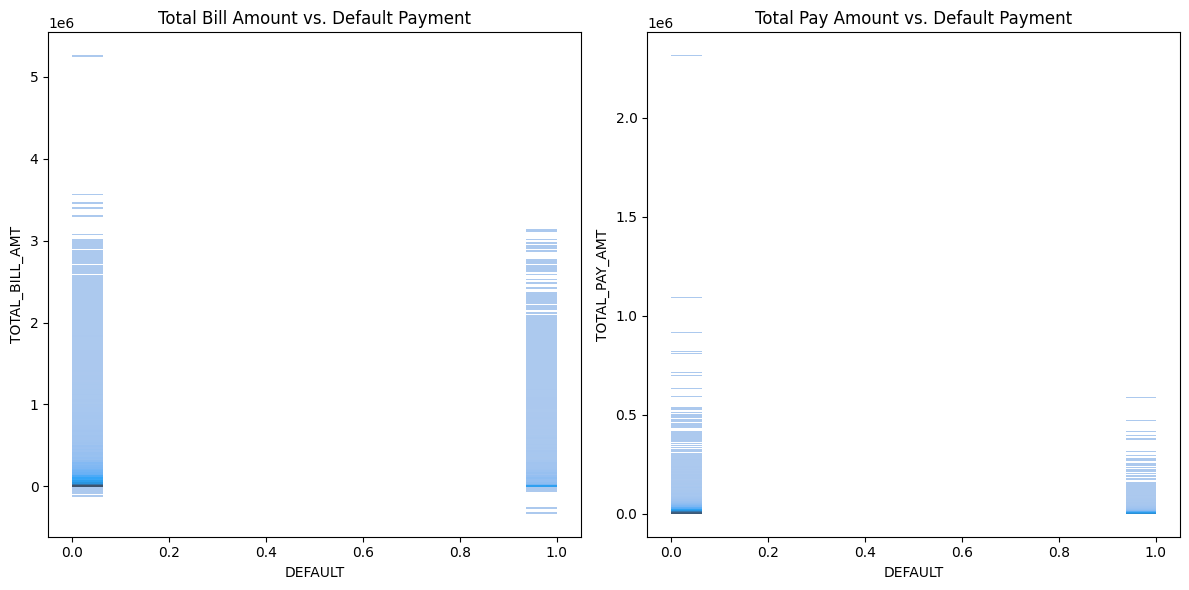

In [105]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(x='DEFAULT', y='TOTAL_BILL_AMT', kde=True, data=df2)
plt.title("Total Bill Amount vs. Default Payment")

plt.subplot(1, 2, 2)
sns.histplot(x='DEFAULT', y='TOTAL_PAY_AMT', kde=True, data=df2)
plt.title("Total Pay Amount vs. Default Payment")

plt.tight_layout()

This clearly shows that there are few outliers, especially at the upper end of the distributions, which may affect out **generalization** task at the later stage. So we must remove these outliers for better generalization.

**NOTE:** We must first check the reasons for the existance of these outliers before removing them as they might give a good understanding about the business or the data at the hand. Also, sometimes these outliers consists great information.

Since we do not have much information about these particular instances, we can safely remove these upperbound outliers.

In [106]:
p = 0.99
upper = df2['TOTAL_BILL_AMT'].quantile(p)
df3 = df2[df2['TOTAL_BILL_AMT'] <= upper]
df3.shape

(28871, 27)

In [107]:
p = 0.99
upper = df3['TOTAL_PAY_AMT'].quantile(p)
df3 = df3[df3['TOTAL_PAY_AMT'] <= upper]
df3.shape

(28582, 27)

**Now let's check how our observations look after removing outliers:**

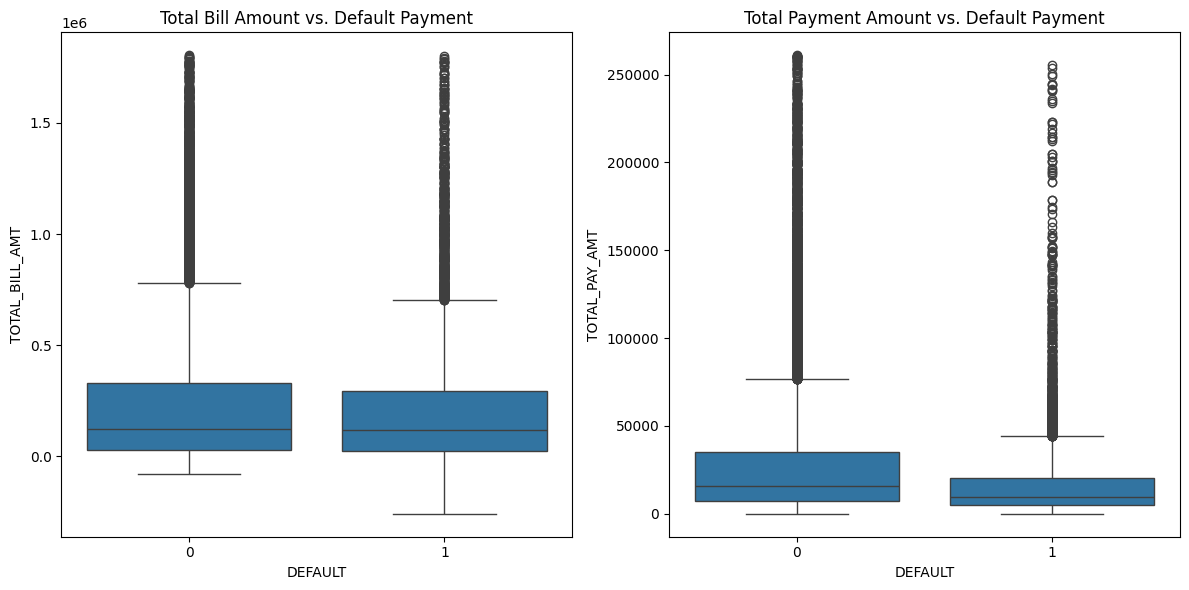

In [108]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='DEFAULT', y='TOTAL_BILL_AMT', data=df3)
plt.title('Total Bill Amount vs. Default Payment')

plt.subplot(1, 2, 2)
sns.boxplot(x='DEFAULT', y='TOTAL_PAY_AMT', data=df3)
plt.title('Total Payment Amount vs. Default Payment')

plt.tight_layout()

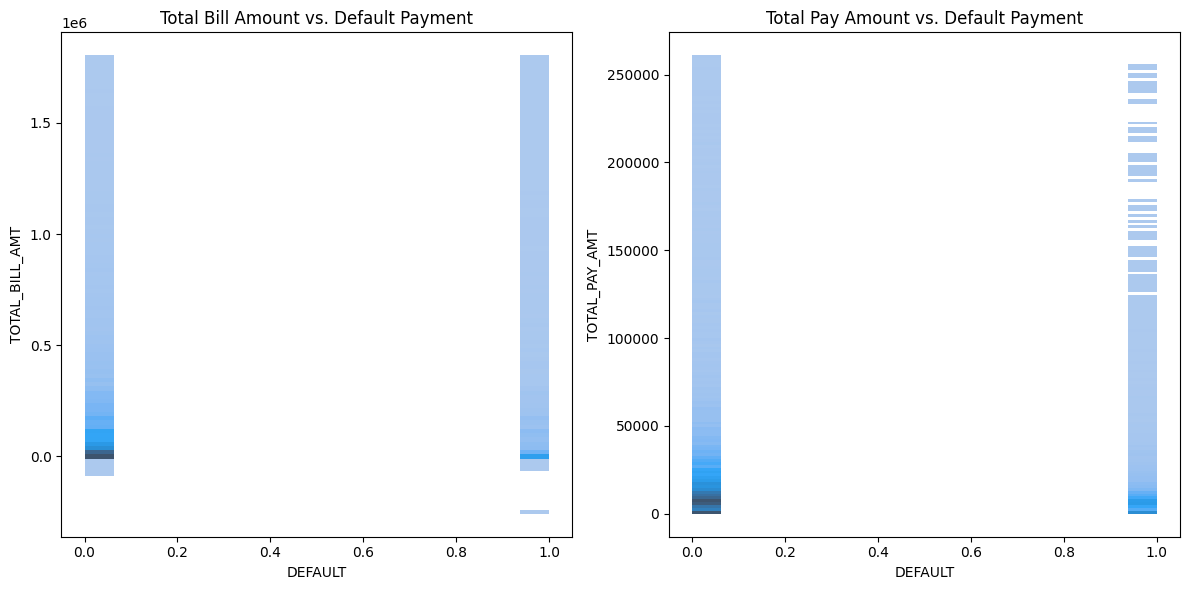

In [109]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(x='DEFAULT', y='TOTAL_BILL_AMT', kde=True, data=df3)
plt.title("Total Bill Amount vs. Default Payment")

plt.subplot(1, 2, 2)
sns.histplot(x='DEFAULT', y='TOTAL_PAY_AMT', kde=True, data=df3)
plt.title("Total Pay Amount vs. Default Payment")

plt.tight_layout()

**Let us also plot Q-Q plot to get a better understanding of the distribution of the data:**

In [110]:
bill_amt_0 = df3[df3['DEFAULT'] == 0]['TOTAL_BILL_AMT']
bill_amt_1 = df3[df3['DEFAULT'] == 1]['TOTAL_BILL_AMT']
pay_amt_0 = df3[df3['DEFAULT'] == 0]['TOTAL_PAY_AMT']
pay_amt_1 = df3[df3['DEFAULT'] == 1]['TOTAL_PAY_AMT']

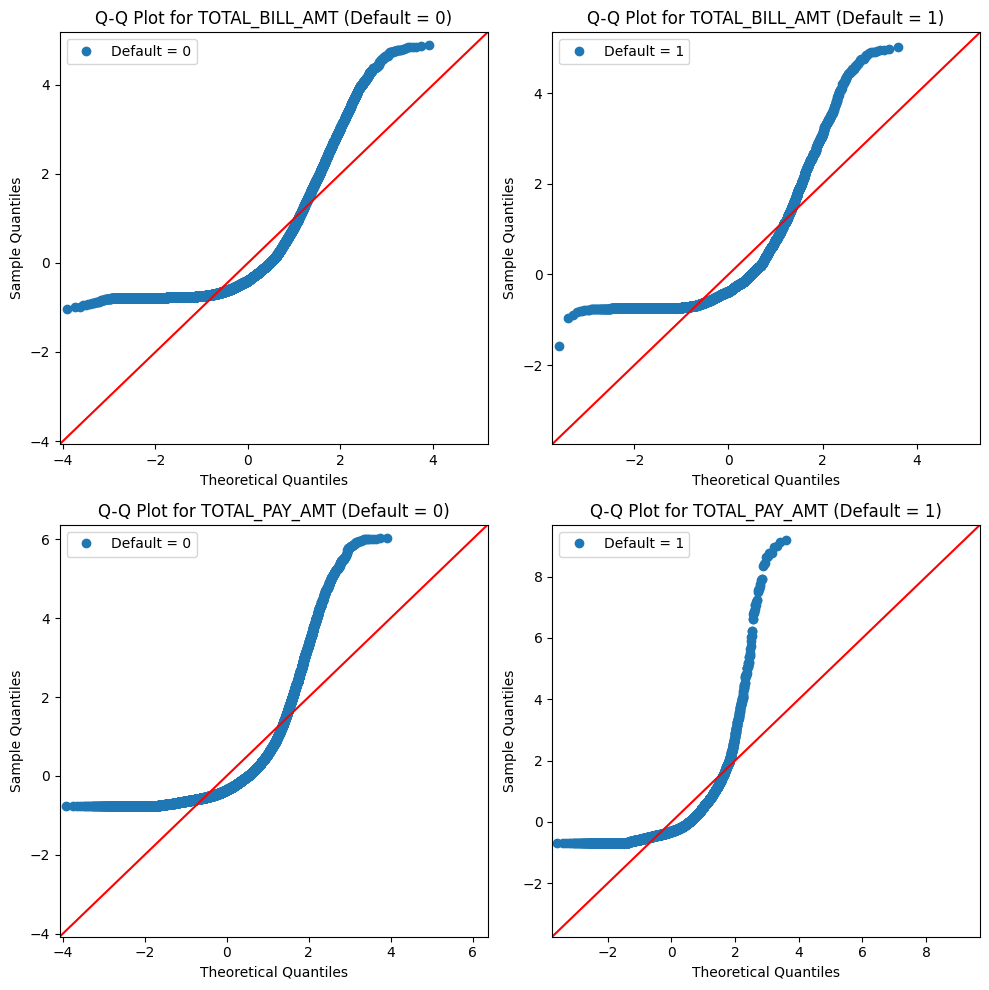

In [111]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sm.qqplot(bill_amt_0, line='45', fit=True, label='Default = 0', ax=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot for TOTAL_BILL_AMT (Default = 0)')
axes[0, 0].set_xlabel('Theoretical Quantiles')
axes[0, 0].set_ylabel('Sample Quantiles')
axes[0, 0].legend()


sm.qqplot(bill_amt_1, line='45', fit=True, label='Default = 1', ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot for TOTAL_BILL_AMT (Default = 1)')
axes[0, 1].set_xlabel('Theoretical Quantiles')
axes[0, 1].set_ylabel('Sample Quantiles')
axes[0, 1].legend()


sm.qqplot(pay_amt_0, line='45', fit=True, label='Default = 0', ax=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot for TOTAL_PAY_AMT (Default = 0)')
axes[1, 0].set_xlabel('Theoretical Quantiles')
axes[1, 0].set_ylabel('Sample Quantiles')
axes[1, 0].legend()

sm.qqplot(pay_amt_1, line='45', fit=True, label='Default = 1', ax=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot for TOTAL_PAY_AMT (Default = 1)')
axes[1, 1].set_xlabel('Theoretical Quantiles')
axes[1, 1].set_ylabel('Sample Quantiles')
axes[1, 1].legend()


plt.tight_layout()

This shows that we have significanty removed the outliers but the data is still skewed. Since we do not have much information about these observations, we canmove forward with this skewed data.

# Exploratory Data Analysis (EDA)

Let us convert the `AGE` from numerical to categorical variable to get better understanding of the relationship with other categories and variables.

In [112]:
# Define age categories and their corresponding labels
bins = [0, 25, 35, 60, float('inf')]  # Define age ranges
labels = ['Young Adult', 'Adult', 'Middle-Aged', 'Senior']

# Create a new column 'Age_Category' based on age
df3.loc[:, 'AGE_CATEGORY'] = pd.cut(df3['AGE'], bins=bins, labels=labels,
                                    right=False)
df3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,TOTAL_BILL_AMT,TOTAL_PAY_AMT,AGE_CATEGORY
1,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,689,0,0,0,0,1,7704,689,Young Adult
2,2,120000,Female,University,Single,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,17077,5000,Adult
3,3,90000,Female,University,Single,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,101653,11018,Adult
4,4,50000,Female,University,Married,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,231334,8388,Middle-Aged
5,5,50000,Male,University,Married,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,109339,59049,Middle-Aged


## Default's relationship

**Let us plot the relationship of `DEFAULT` with each category, to see how the relationship changes from category to category:**

**NOTE:** DEFAULT = 0 means no default and 1 means default.

Text(0, 0.5, 'Count')

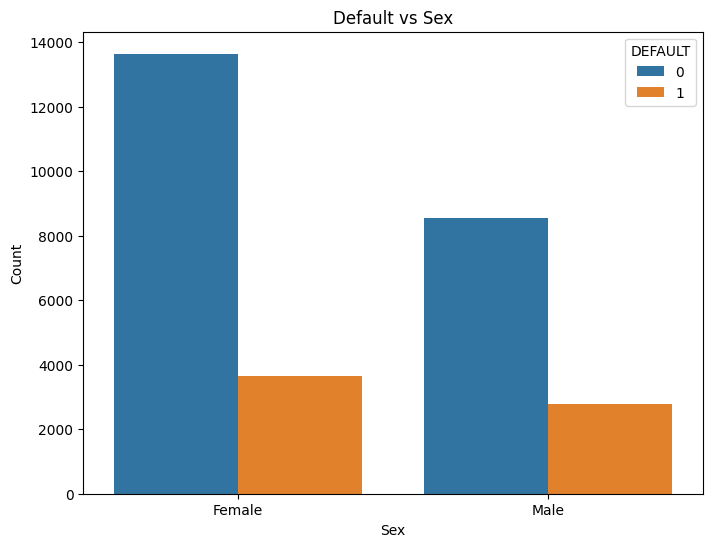

In [113]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SEX', hue='DEFAULT', data=df3)
plt.title('Default vs Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

This shows that Female (in our data) are take more loans as compared to Male and proportionately Female are making less defaults as compared to the Male.

Text(0, 0.5, 'Count')

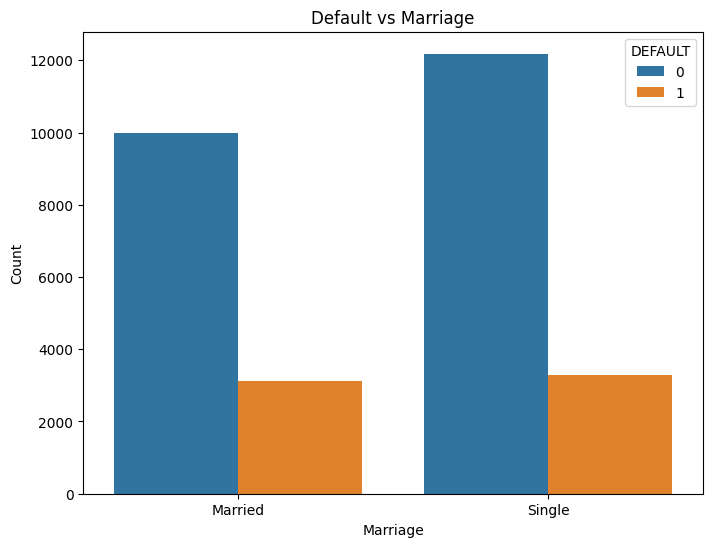

In [114]:
plt.figure(figsize=(8, 6))
sns.countplot(x='MARRIAGE', hue='DEFAULT', data=df3)
plt.title('Default vs Marriage')
plt.xlabel('Marriage')
plt.ylabel('Count')

Here, Singles are taking more loans as compared to the married people, but at the same time they are proportionately making less defaults as compared to married individuals.

Text(0, 0.5, 'Count')

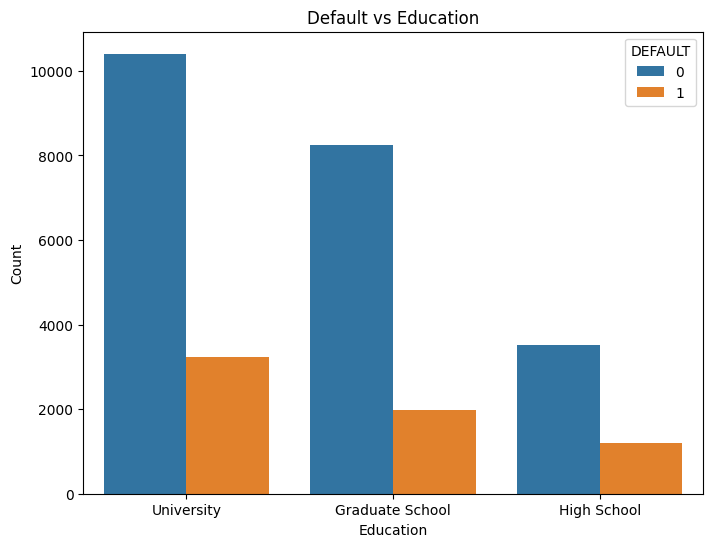

In [115]:
plt.figure(figsize=(8, 6))
sns.countplot(x='EDUCATION', hue='DEFAULT', data=df3)
plt.title('Default vs Education')
plt.xlabel('Education')
plt.ylabel('Count')

This shows that University Graduate people are taking more loans then Graduates from school and then High School graduates. But when we look at the proportion of the default, all are having similar proportion of defaulting.

From this we can somewhat infer that, higher the education level, higher is the loan taking capacity. Which can rightly be supported with appropriate literature, as with higher education levels, the income increases and thus banks can provide more loans to those individual.

Text(0, 0.5, 'Count')

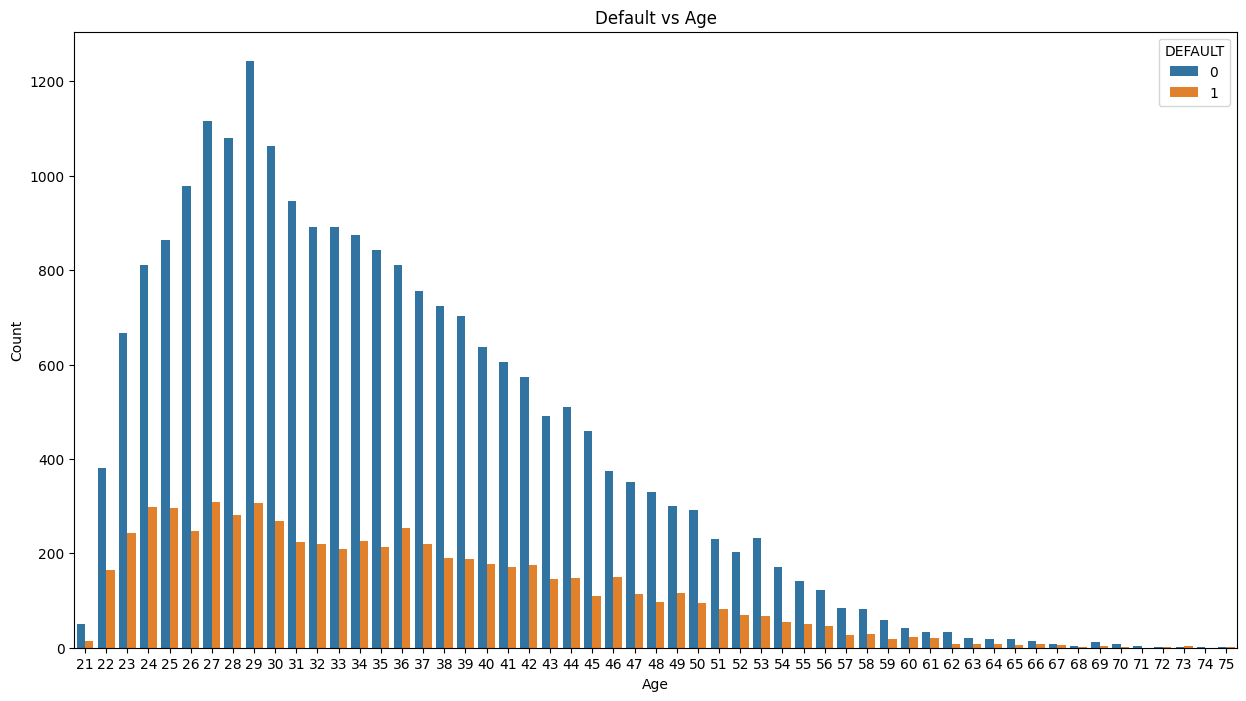

In [116]:
plt.figure(figsize=(15, 8))
sns.countplot(x='AGE', hue='DEFAULT', data=df3)
plt.title('Default vs Age')
plt.xlabel('Age')
plt.ylabel('Count')

This shows that the borrowing peaks around 25-30 years of age, so does the default. But with increase in age, the number of people not defaulting reduces more quickly as compared to the ones who are defaulting, i.e. the proportion of defaulters to the numbers of borrowers increases.

**Now let us plot the relationship of pairs of categories with respect to the `TOTAL_BILL_AMT`, `TOTAL_PAY_AMT` and `DEFAULT`, to see how each category and sub category affects the patter of default.**

To do so, let's first define a utility function `plot_grouped_data`, which will help in groupping the dataframe with respect to the pair of categories, and returns first `groupped_data` with mean of each aggregate column and then plots them:

In [117]:
def plot_grouped_data(df, group_columns, agg_columns):
    grouped_data = df.groupby(group_columns,
                              observed=True)[agg_columns].mean().reset_index()

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot bar chart for the first two aggregate columns
    bar_width = 0.3
    x = np.arange(len(grouped_data))
    lns1 = ax1.bar(x - bar_width/2, grouped_data[agg_columns[0]],
                   label=agg_columns[0], width=bar_width, align='center')
    lns2 = ax1.bar(x + bar_width/2, grouped_data[agg_columns[1]],
                   label=agg_columns[1], width=bar_width, align='center')

    ax1.set_xlabel(str(group_columns))
    ax1.set_ylabel(f"{agg_columns[0]} / {agg_columns[1]}")
    ax1.set_xticks(x)
    ax1.set_xticklabels(grouped_data[group_columns].apply(
        lambda x: ', '.join(map(str, x)), axis=1), rotation=45, ha='right')


    # Create secondary axis and plot points for the third aggregate column
    ax2 = ax1.twinx()
    lns3 = ax2.plot(x, grouped_data[agg_columns[2]],
                    'ro', label=agg_columns[2])
    ax2.set_ylabel(agg_columns[2])

    # Combine labels and handles for the single legend
    lns = [lns1, lns2] + lns3
    labs = [l.get_label() for l in lns]

    # Place the legend outside the plot
    fig.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=3)
    plt.title(f"Average {', '.join(agg_columns)} (by {' & '.join(group_columns)})")
    plt.tight_layout(rect=[0, 0.05, 1, 1])

    return grouped_data, fig

**Now, let's first group the data with `SEX` and `EDUCATION` categories and then plot them:**

(0     SEX        EDUCATION  TOTAL_BILL_AMT  TOTAL_PAY_AMT   DEFAULT
 0  Female  Graduate School   216207.863068   30894.168367  0.182851
 1  Female      High School   229401.026155   22525.985668  0.239699
 2  Female       University   261541.688035   25412.004044   0.22098
 3    Male  Graduate School   250614.493394   32447.448715  0.210425
 4    Male      High School   239208.596976   22364.221064  0.274765
 5    Male       University   258097.951397   24028.284347  0.262342,
 <Figure size 1200x600 with 2 Axes>)

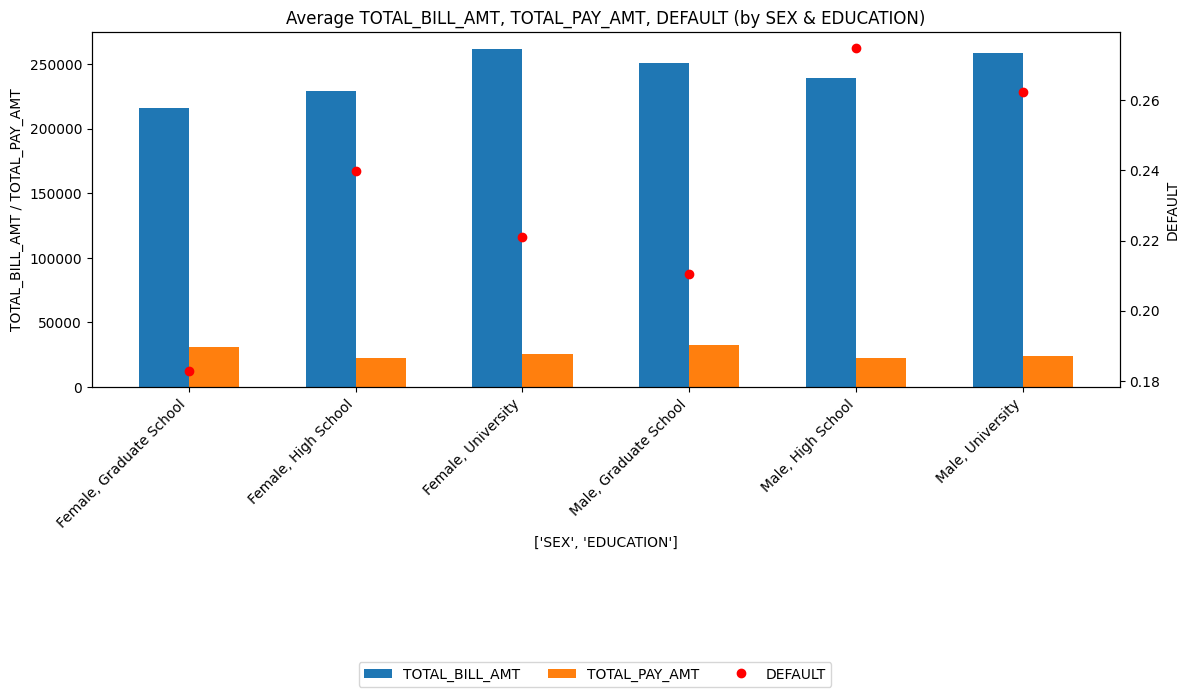

In [118]:
plot_grouped_data(df3, ["SEX", "EDUCATION"],
 ["TOTAL_BILL_AMT", "TOTAL_PAY_AMT", "DEFAULT"])

We will infer the result one by one:
* **Female vs Male (High School):** The mean Total bill amount and Total pay amount for the Female and Male is somewhat similar, but they have less probability of making a default as compared to the Male counterpart.
* **Female vs Male (Graduate School):** The mean Total bill amount is higher for the Male, total pay amount is somewhat similar for both, but the average default probability is higher for Male as compared to Female.
* **Female vs Male (University):** The mean Total bill amount and mean Total pay amount is similar for the both sexes, but the default probability for the Male is more than that of the Female.

This shows that the default probability for lower level of education is highest but with increase in level of education it first decreases, then again increases but not to that extent. This is observed across sexes.

**Now let us do same thing with `SEX` and `MARRIAGE` categories:**

(0     SEX MARRIAGE  TOTAL_BILL_AMT  TOTAL_PAY_AMT   DEFAULT
 0  Female  Married   241012.010174   26626.206301  0.223707
 1  Female   Single   239860.016892   27095.594165  0.198859
 2    Male  Married   264544.720129   27885.345154   0.26355
 3    Male   Single   242432.956021   26032.495429  0.231084,
 <Figure size 1200x600 with 2 Axes>)

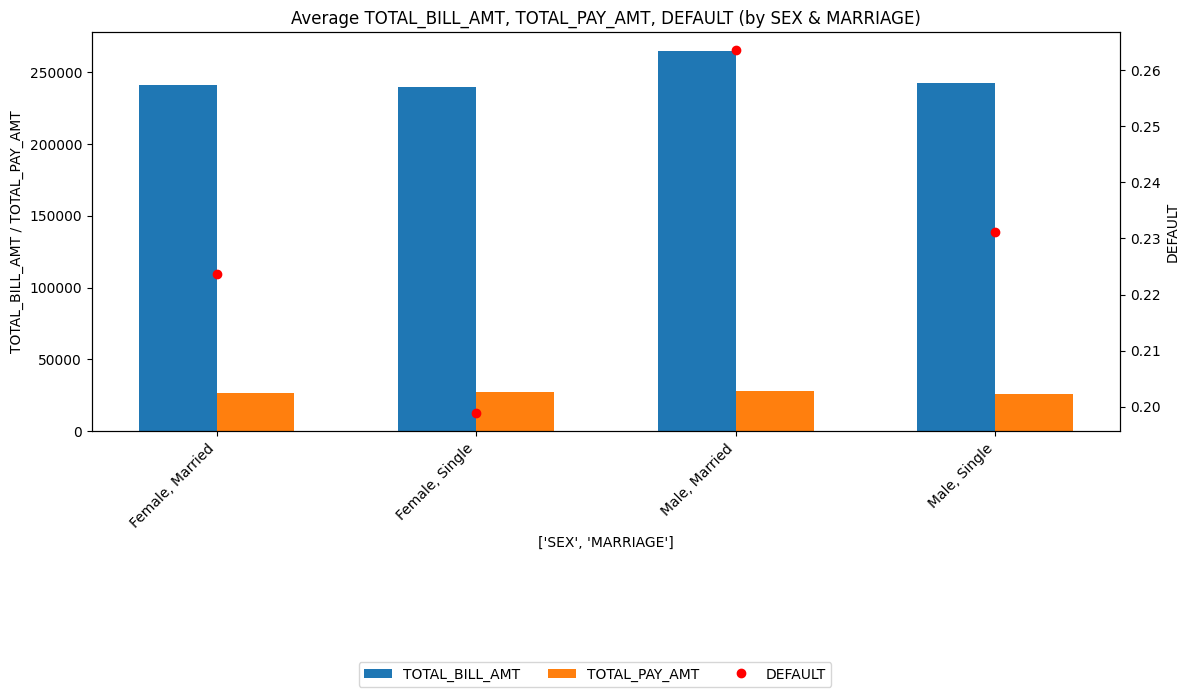

In [119]:
plot_grouped_data(df3, ["SEX", "MARRIAGE"],
 ["TOTAL_BILL_AMT", "TOTAL_PAY_AMT", "DEFAULT"])

Let's observe the plot:
* **Female vs Male (Married):** The mean Total bill amount for the Male is higher and mean total pay amount for both is aproximately same, but the default probability for Male is higher than that of Female.
* **Female vs Male (Single):** Here, the mean Total bill amount and mean total pay amount for both is aproximately same, and the default probability for Male is somewhat higher than that of Female.

* Here, we can also abserve that the default probability for Married individual is always higher than that of Single individual, accross Sexes.

**Now let's do same for `SEX` and `AGE_CATEGORY`:**

(0     SEX AGE_CATEGORY  TOTAL_BILL_AMT  TOTAL_PAY_AMT   DEFAULT
 0  Female  Young Adult   166347.650107   16879.079060  0.262286
 1  Female        Adult   256675.897644   28127.924038  0.195442
 2  Female  Middle-Aged   241748.122228   28231.773711  0.211328
 3  Female       Senior   254992.080000   18912.286667  0.313333
 4    Male  Young Adult   120161.398148   11469.863757  0.304233
 5    Male        Adult   255266.965828   28139.448428  0.223899
 6    Male  Middle-Aged   266143.012640   27914.834965  0.254406
 7    Male       Senior   289874.225610   23482.347561  0.286585,
 <Figure size 1200x600 with 2 Axes>)

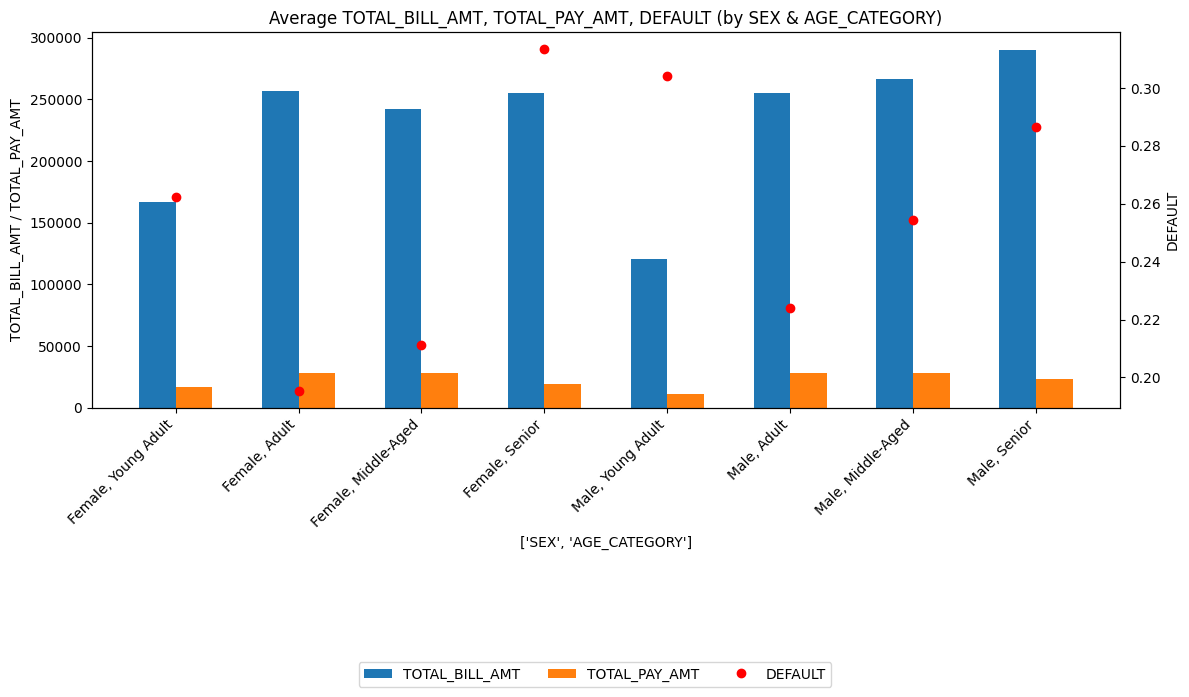

In [120]:
plot_grouped_data(df3, ["SEX", "AGE_CATEGORY"],
                  ["TOTAL_BILL_AMT", "TOTAL_PAY_AMT", "DEFAULT"])

Let's look at the observations:
* **Female vs Male (Young Adult):** The mean total bill amount for Female is higher than that of Male, but the mean total pay amount is aproximately similar for the both. This shows that on an average Female are borrowing more as compared to the Male in this category. But when we look at the default, Male got higher probability of defaulting as compared to the Female.
* **Female vs Male (Adult):** The mean total bill amount and total pay amount is similar for the both categories, but here also the default probability for Male is higher.
* **Female vs Male (Middle-Aged):** Here the mean total bill amount for Male is slightly higher, the mean total pay amount is similar but default probability is higher for Male.
* **Female vs Male (Senior):** The story changes here. The mean total bill amount is higher for Male, the mean total pay amount is similar , but the *default probability for Female is higher as compared to Male.*


* Here we can observe that there is somewhat **'U-shaped' curve** for the default probability for each Sex along various Age categories and it is minimum when one is Adult (probably because of working age) and reaches maximum when one is Senior (because of retirement, medical conditions or deceased).
* Also we can see that the default probability for the male in each age category, except Senior, is higher than the Female counterpart.

**Let's look at the `MARRIAGE` and `EDUCATION` category:**

(0 MARRIAGE        EDUCATION  TOTAL_BILL_AMT  TOTAL_PAY_AMT   DEFAULT
 0  Married  Graduate School   231545.278290   34375.253143  0.209835
 1  Married      High School   240497.223284   21904.963199  0.265039
 2  Married       University   263663.746426   25413.803157  0.243151
 3   Single  Graduate School   229472.456607   29994.394144  0.185586
 4   Single      High School   222737.758895   23293.242698  0.237387
 5   Single       University   256880.122290   24364.967042  0.230703,
 <Figure size 1200x600 with 2 Axes>)

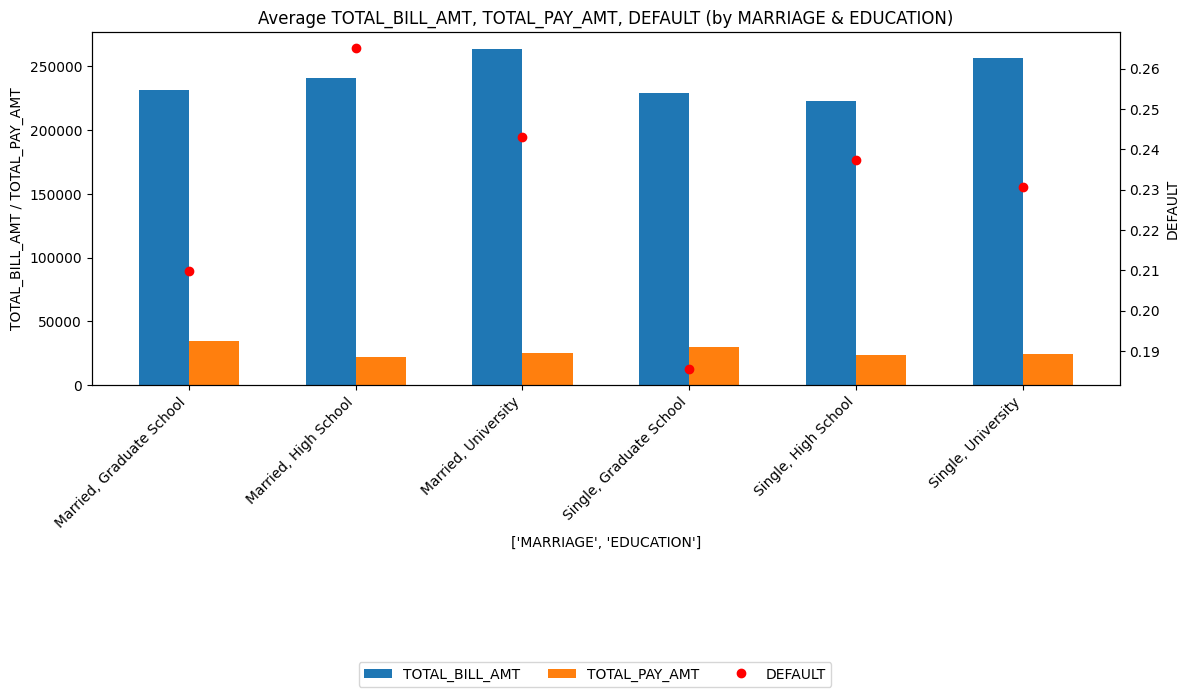

In [121]:
plot_grouped_data(df3, ["MARRIAGE", "EDUCATION"],
                  ["TOTAL_BILL_AMT", "TOTAL_PAY_AMT", "DEFAULT"])

Let's look at the observations:
* **Married vs Single (High School):** The average total bill amount and default probability, both is higher for Married individual, where as the average total pay amount is similar for both.
* **Married vs Single (Graduate School):** The default probability is lower for the Singles as compared to the Married individuals. The average total pay amount and the average total bill amount is somewhat similar.
* **Married vs Single (University):** The average total bill amount and the average pay amount is similar for both, and the default probability for married individual is higher than the singles.

* Here we can make another observation: the default probability is highest for one Graduated from High School and lowest for Graduate School either married or single, as observed above.

**Now Let us look at the `MARRIAGE` and `AGE_CATEGORY`:**

(0 MARRIAGE AGE_CATEGORY  TOTAL_BILL_AMT  TOTAL_PAY_AMT   DEFAULT
 0  Married  Young Adult   174504.428058   15249.161871  0.320144
 1  Married        Adult   260051.716770   26689.395225  0.232538
 2  Married  Middle-Aged   247873.069228   27779.104713  0.236856
 3  Married       Senior   270090.615970   21325.243346   0.30038
 4   Single  Young Adult   150524.505106   15331.738723  0.268936
 5   Single        Adult   254688.281824   28667.720582  0.196522
 6   Single  Middle-Aged   262370.239530   28839.134576  0.213228
 7   Single       Senior   289301.039216   21164.882353  0.294118,
 <Figure size 1200x600 with 2 Axes>)

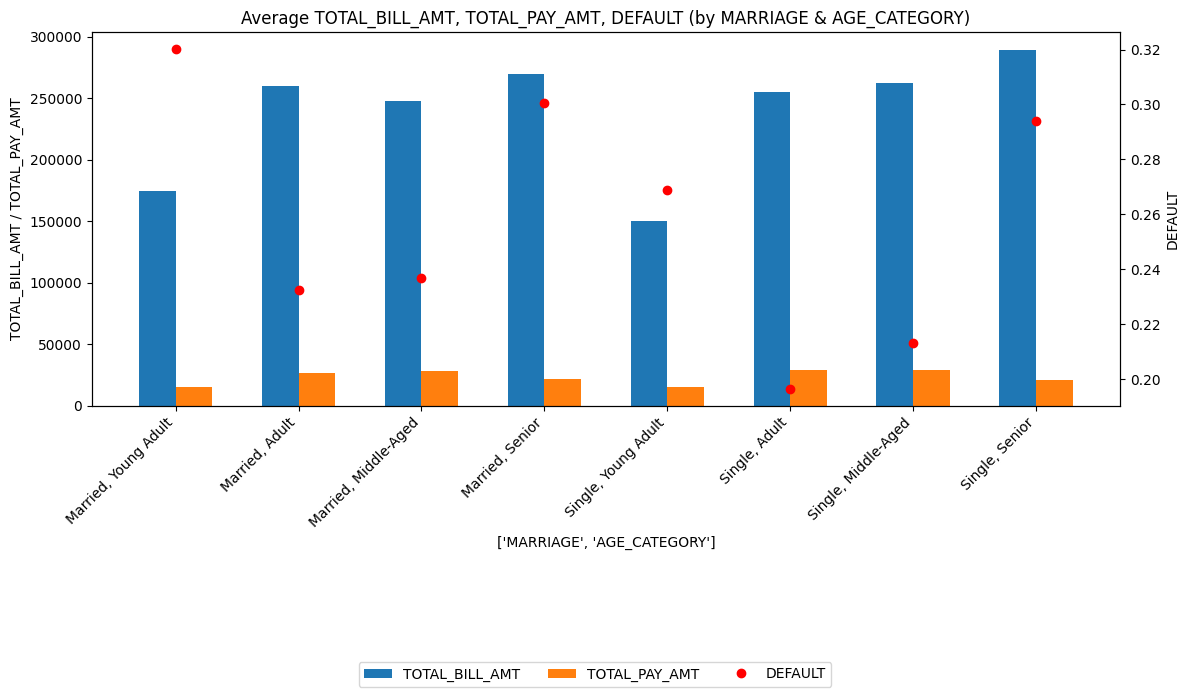

In [122]:
plot_grouped_data(df3, ["MARRIAGE", "AGE_CATEGORY"],
                  ["TOTAL_BILL_AMT", "TOTAL_PAY_AMT", "DEFAULT"])

Let's look at the observations:
* **Married vs Single (Young Adult):** The average total bill amount is higher for Married individual, and so does the default probability. Whereas the average pay amount is higher for Singles.
* **Married vs Single (Adult):** The average total bill amount and the average pay amount is similar for the both categories. Whereas the default probability is higher for Married individuals.
* **Married vs Single (Middle-Aged):** The default probability is higher for Married individuals, and the average total bill amount and average pay amount is similar for both.
* **Married vs Single (Senior):** The average total bill amount for Singles is way higher than that of Married individual, whereas the average total pay amount is low for singles. But we are observing the default probability for both is somewhat similar.

* As observed earlier, here also we can see somewhat of **'U-shaped' curve** of default probability through Age Category either Single or Married. Minimum when Adult and maximum when Senior.

These are the various observations we can make from the categorical variables with respect to Numerical variables like Total Bill Amount and Total Pay Amount.

Now, let's us look at these variables from Econometric and Machine Learning perspective and try to predict the default probability using these informations.

# Econometric Modeling

Before doing any furter analysis, let's us first convert the Categorical variables to numerical as **Dummy Variables**:

In [161]:
df4 = pd.get_dummies(df3,
                     columns=['SEX', 'EDUCATION', 'MARRIAGE'],
                     drop_first=True, dtype=int)
df4 = df4.drop(columns=['ID', 'AGE_CATEGORY'])
df4.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,TOTAL_BILL_AMT,TOTAL_PAY_AMT,SEX_Male,EDUCATION_High School,EDUCATION_University,MARRIAGE_Single
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,7704,689,0,0,1,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,17077,5000,0,0,1,1
3,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,0,101653,11018,0,0,1,1
4,50000,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,0,231334,8388,0,0,1,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,109339,59049,1,0,1,0


Let's first observe the correlation between the variables to avoid the problem of **Multicollinearity**:

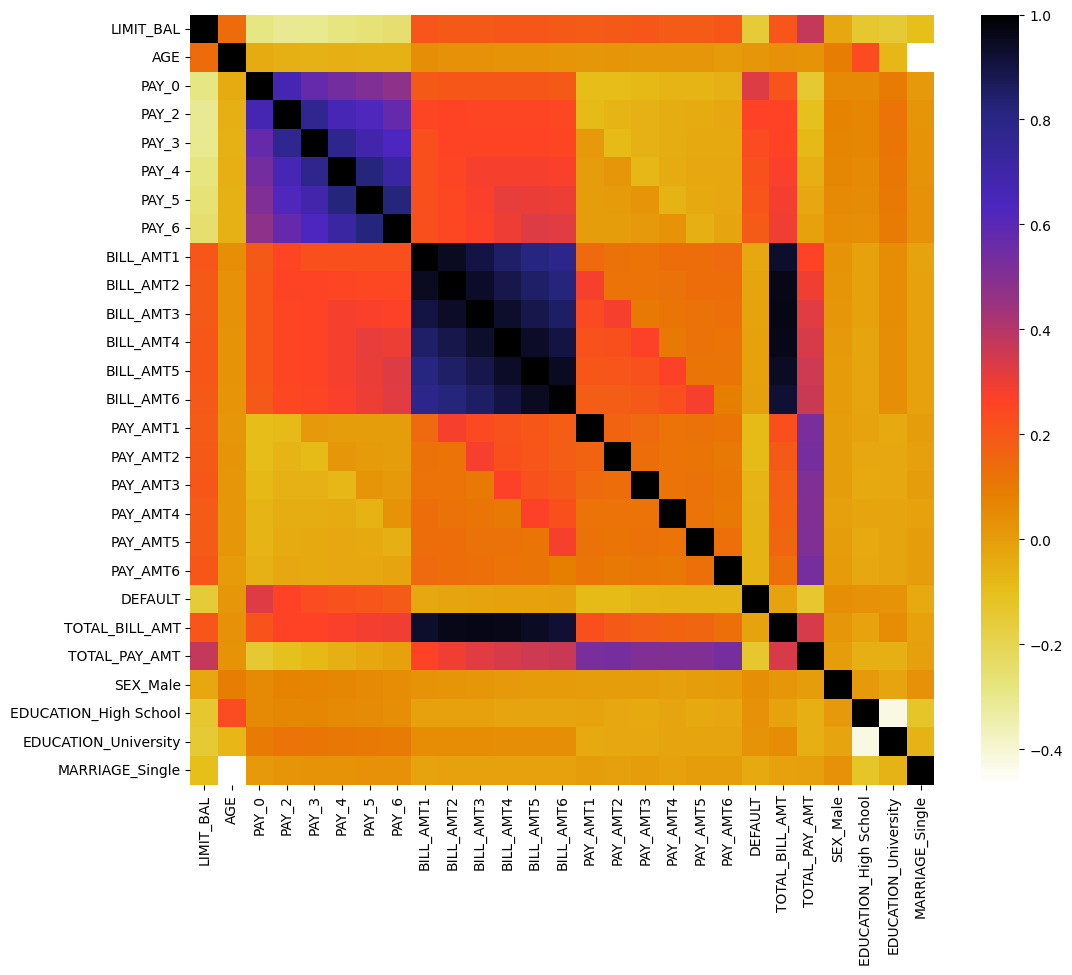

In [162]:
plt.figure(figsize=(12,10))
cor = df4.corr()
sns.heatmap(cor, cmap=plt.cm.CMRmap_r)
plt.show()

Here we can observe one main patterns, the Payment Status of one month is highly correlated with other months' Payment Status and also with Bill Amount. Which is quite obvious as with higher Bill amount the Payment tends to get delayed.

Now our data is ready for Analysis.

Let's do **Logistic Regression** for defining causalty of change in Dependent variable, `DEFAULT` with respect to other Independent Variables.</br>
We are using Logistic Regression because we have to find out the probability of Default and it is a categorical variable where 0 is represented with NOT-Default and 1 with Default.

In [163]:
df4 = df4.apply(pd.to_numeric, errors='coerce').fillna(0)

In [164]:
df4.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT', 'TOTAL_BILL_AMT',
       'TOTAL_PAY_AMT', 'SEX_Male', 'EDUCATION_High School',
       'EDUCATION_University', 'MARRIAGE_Single'],
      dtype='object')

In [165]:
X = df4[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','SEX_Male', 'EDUCATION_High School',
       'EDUCATION_University', 'MARRIAGE_Single', 'AGE', 'LIMIT_BAL']]

y = df4['DEFAULT']

X = sm.add_constant(X)
X = X.astype(float)

In [166]:
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.465998
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                28582
Model:                          Logit   Df Residuals:                    28557
Method:                           MLE   Df Model:                           24
Date:                Wed, 23 Apr 2025   Pseudo R-squ.:                  0.1246
Time:                        11:49:59   Log-Likelihood:                -13319.
converged:                       True   LL-Null:                       -15215.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.0082      0.084    -11.961      0.000      -1.173      -0.

Here we can observe that the Pseudo R-squ. is 0.125 showing that the model is explained by around 12.5% with the help of the given data, that is qute good. But when we look at the degrees of freedom, we can say that this certainty is with a cost i.e. with 26 Degrees of Freedom. This is quite acceptabe as we have alot of observations to pay for it.

Here, we also can observe that the Bill Amount, except for first 2 months, is less statistically significant as their p-values are quite high than the acceptable range.

**OBSERVATIONS:**
* We have many variables which are **Statistically insignificant**, if we have to make a model having higher Precision as compared to Recall, we will eleminate those variables. But since we have to predict Default probability, a less precision and higher recall will work for making future decisions.
* **Too much of Variables:** Since we have significanty large dataset, we can ignore this factor.

In [167]:
# Final DATA

df5 = df4.drop(['TOTAL_BILL_AMT', 'TOTAL_PAY_AMT'], axis=1)

# MACHINE LEARNING

Let us now explore some of the well know Machine Learning Algorithms and see how well our data performs on these models.

## Logistic regression

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [192]:
X = df5[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','SEX_Male', 'EDUCATION_High School',
       'EDUCATION_University', 'MARRIAGE_Single', 'AGE', 'LIMIT_BAL']]
y = df5["DEFAULT"].to_numpy().astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [193]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [204]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [205]:
log_reg.score(X_test_scaled, y_test)

0.8100402308903271

In [206]:
from sklearn.model_selection import cross_val_score

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
cross_val_score(log_reg, X_scaled, y, cv=5, scoring='accuracy') # cv=5 for 5-fold

array([0.79884555, 0.80304355, 0.81070679, 0.81245626, 0.81018195])

This shows that the Logistic Regression Model is able to predict right class around 81% of times, which is quite good for a model requiring higher Recall as compared to the Precision.

## Lasso & Elastic Regression

In [207]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [208]:
from sklearn.metrics import accuracy_score

y_pred = lasso_reg.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy of Lasso model: {accuracy}")

Accuracy of Lasso model: 0.7789050201154452


In [209]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.1)

In [210]:
y_pred = elastic_net.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy of Elastic Net model: {accuracy}")

Accuracy of Elastic Net model: 0.7796046877733077


Here, both Lasso and Elstic Regression is showing around 78% of accuracy, which is less that the Logistic Regression.

## Essemble Learning

Essemble Learning are those models which are built upon other models and combine them developing new model. Eg. **Random Forest Classifier** and **Voting Classifier**.

Here we will be using both:

In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [213]:
# Hard Voting
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)

voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [214]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8100402308903271
RandomForestClassifier 0.8137134860941053
SVC 0.8217596641595242
VotingClassifier 0.821409830330593


In [215]:
from sklearn.metrics import roc_auc_score

# Train the SVM model with probability=True
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Get the decision function scores
decision_scores = svm_model.decision_function(X_test_scaled)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, decision_scores)
print(f"AUC-ROC score: {auc_roc}")

AUC-ROC score: 0.7085556210149891


This shows that, among the given models **Support Vector Machine** performs best on out data which is giving accuracy of around **80.5%** and the ROC-AUC score is around **0.70**.

Observing all these models we learned that the best model for our data is **Support Vector Machine** which is considered to be best for binary classification, which is the goal of our analysis.

## Neural Networks

Let's also explore some of the basic neural ntworks:

### Multiple Layered Perceptron

In [216]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000, random_state=42)
mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=[5], max_iter=10000, random_state=42)

In [217]:
mlp_clf.score(X_test_scaled, y_test)

0.8189609935280742

### Deep Neural Network

In [218]:
import tensorflow as tf

In [219]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [150]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,
                                                              test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full,
                                                      test_size=0.2)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [220]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [221]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

earl_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                    restore_best_weights=True)

model.fit(X_train_scaled, y_train, epochs=30,
          validation_data=(X_valid_scaled, y_valid), callbacks=[earl_stopping_cb])

model.evaluate(X_test_scaled, y_test)

Epoch 1/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8004 - loss: 0.4907 - val_accuracy: 0.8211 - val_loss: 0.4399
Epoch 2/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8145 - loss: 0.4465 - val_accuracy: 0.8255 - val_loss: 0.4325
Epoch 3/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8175 - loss: 0.4383 - val_accuracy: 0.8262 - val_loss: 0.4297
Epoch 4/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8190 - loss: 0.4331 - val_accuracy: 0.8259 - val_loss: 0.4269
Epoch 5/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8211 - loss: 0.4288 - val_accuracy: 0.8255 - val_loss: 0.4249
Epoch 6/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8223 - loss: 0.4251 - val_accuracy: 0.8264 - val_loss: 0.4218
Epoch 7/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8218 - loss: 0.4220 - val_accuracy: 0.8272 - val_loss: 0.4203
Epoch 8/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8230 - loss: 0.4192 - val_accuracy: 0.

[0.5268074870109558, 0.7934231162071228]

Here we have defined the model with:
* One **Flatten** Input layer,
* Two Dense layers (300 and 100 neurons respectively) with **ReLU activation** function and **He Normal initializer**, and
* One output layer with one neuron and **Sigmoid** activation function, since probabilistic model.

Then we compiled the model with:
* Loss as **Binary Crossentropy**, since only two classes (Default and Not-Default),
* **Adam** Optimizer for quicker conversion, and
* **Accuracy** metric for evaluation

Here, we have also used **Early Stoppong Callback** to make sure that training stops once it converges to the best epoch and Weights and Biases.

The model gives around 80% accuracy on test batch with around 46% of loss. Which is similar with our previous models.

# Conclusion


## Key Outcomes:

### EDA Insights:

* Defaults correlated with delayed payments (PAY_0-PAY_6) and lower education levels.

* Higher credit limits (LIMIT_BAL) were associated with lower default rates.

* Age and marital status showed nuanced relationships with default risk.

### Model Performance:
The SVM classifier achieved the highest accuracy (~82%) and AUC-ROC score (0.70), outperforming logistic regression and decision trees. Key predictive features included recent payment delays and historical bill amounts.

### Business Impact:

* Proactive risk mitigation by flagging high-risk clients.

* Reduced financial losses through targeted interventions (e.g., adjusted credit limits).

* Improved customer retention via personalized risk-based pricing.

### Future Work:

* Incorporate macroeconomic factors (e.g., unemployment rates).

* Experiment with ensemble methods (e.g., XGBoost) and deep learning.

* Address class imbalance using SMOTE or cost-sensitive learning.

* Validate model performance on real-time transactional data

## Contributor
Utkarsh Bhardwaj

**Publish Date:** 28th Feburary, 2025

**Contact:** ubhardwaj284@gmail.com

[LinkedIn](https://www.linkedin.com/in/utkarsh284/) | [GitHub](https://github.com/utkarsh-284)
